# **Labeling and Image Selection**

Karena data MRI memiliki banyak slice, memilih beberapa slice tentunya membuat proses komputasi menjadi lebih mudah, maka dari itu saya memilih 3 slice terbesar dari keseluruhan slice.

---

## 1. Import packages

Import modul-modul yang diperlukan untuk pengolahan citra medis, termasuk pembacaan citra dengan `SimpleITK`, manipulasi array dengan `NumPy`

In [1]:
import os
import SimpleITK as sitk
import numpy as np
import gc
import cv2
import matplotlib.pyplot as plt
from scipy.stats import entropy

## 2. Load Data

### 2.1 Menampilkan File Bukan Nifti
menampilkan file yang berada dalam direktori yang bukan berformat NIfTI 

In [2]:
directory_path = r'D:\Users\RESA\Coding\Data'

def display_non_nifti_files(directory_path):
    non_nifti_files = [filename for filename in os.listdir(directory_path) if not filename.endswith(('.nii.gz'))]

    if non_nifti_files:
        print("File yang bukan berformat NIfTI:")
        for filename in non_nifti_files:
            print(filename)
    else:
        print("Tidak ada file yang bukan berformat NIfTI dalam direktori ini.")

display_non_nifti_files(directory_path)

File yang bukan berformat NIfTI:
AD
CN
EMCI
LMCI


### 2.2 Hapus File Bukan Nifti
hapus file yang bukan berformat nii.gz, menggunakan `os.walk` agar pencarian bisa dilakukan pada subfolder

In [3]:
image_extensions = ('.nii.gz')
def display_and_delete_non_nifti_files(directory_path):
    for root, subdirs, files in os.walk(directory_path):
        for filename in files:
            file_path = os.path.join(root, filename)
            
            if not filename.endswith((image_extensions)):
                print(f"File yang bukan berformat NIfTI: {file_path}")
                os.remove(file_path)
                print(f"{filename} telah dihapus.")
                
display_and_delete_non_nifti_files(directory_path)

### 2.3 Load Data
mengumpulkan daftar semua file gambar dalam folder dan subfolder

In [4]:
image_file_list = []
for root, subdirs, files in os.walk(directory_path):
    for filename in files:
        if filename.endswith(image_extensions):
            file_path = os.path.join(root, filename)
            image_file_list.append(file_path)

memuat dan menampilkan semua gambar menggunakan `sitk.ReadImage(file_path)`

In [5]:
medical_image_list = []

for file_path in image_file_list:
    try:
        image_obj = sitk.ReadImage(file_path)
        print(f'Type of the image {type(image_obj)}')
    except Exception as e:
        print(f'Error loading image: {file_path}')
        print(f'Error message: {str(e)}')

for folder_name in ['AD', 'CN', 'EMCI', 'LMCI']:
    folder_full_path = os.path.join(directory_path, folder_name)
    item_count = len(os.listdir(folder_full_path))
    print(f"Folder: {folder_name}, Jumlah isi: {item_count}")

print(f"Jumlah total file: {len(image_file_list)}")

Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'SimpleITK.SimpleITK.Image'>
Type of the image <class 'Si

memuat dan menampilkan bentuk citra otak

In [6]:
for file_path in image_file_list:
    try:
        image_obj = sitk.ReadImage(file_path)
        # Menampilkan path file
        print(f'File Path: {file_path}')
        # Menampilkan bentuk gambar (ukuran gambar)
        size = image_obj.GetSize()
        print(f'Image Shape (Size): {size}')
    except Exception as e:
        print(f'Error loading image: {file_path}')
        print(f'Error message: {str(e)}')

for folder_name in ['AD', 'CN', 'EMCI', 'LMCI']:
    folder_full_path = os.path.join(directory_path, folder_name)
    item_count = len(os.listdir(folder_full_path))
    print(f"Folder: {folder_name}, Jumlah isi: {item_count}")

File Path: D:\Users\RESA\Coding\Data\AD\AD_001_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\AD_002_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\AD_003_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\AD_004_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\AD_005_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\AD_006_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\AD_007_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\AD_008_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\AD_009_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\AD_010_brain.nii.gz
Image Shape (Size): (170, 256, 256)
File Path: D:\Users\RESA\Coding\Data\AD\

pemahaman data citra otak yang dikelompokkan dalam struktur kelas yang berbeda, menyiapkan data untuk dianalisis

In [7]:
class_names = os.listdir(directory_path)

image_files_and_labels = []
class_file_counts = {}

for root, dirs, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)
        label = os.path.basename(root)
        image_files_and_labels.append((file_path, label))
        class_file_counts[label] = class_file_counts.get(label, 0) + 1

# Menampilkan jumlah file dalam setiap kelas
for class_name, file_count in class_file_counts.items():
    print(f"Kelas: {class_name}, Jumlah File: {file_count}")

print(f"Jumlah total file: {len(image_files_and_labels)}")

Kelas: AD, Jumlah File: 200
Kelas: CN, Jumlah File: 200
Kelas: EMCI, Jumlah File: 200
Kelas: LMCI, Jumlah File: 200
Jumlah total file: 800


### 2.4 Simpan Data Dalam Array

In [8]:
# Inisialisasi dictionary untuk menyimpan data berdasarkan label
labeled_data_dict = {}

# Memuat setiap file gambar dalam daftar menggunakan SimpleITK dan menyimpannya dalam dictionary
batch_size = 2  
total_files = len(image_files_and_labels)
current_batch = 1

for batch_num in range(1, total_files // batch_size + 2):
    start_idx = (batch_num - 1) * batch_size
    end_idx = min(batch_num * batch_size, total_files)

    for i in range(start_idx, end_idx):
        try:
            image_obj = sitk.ReadImage(image_files_and_labels[i][0])
            image_array = sitk.GetArrayFromImage(image_obj)

            # Jika label belum ada dalam dictionary, buat array baru untuk label tersebut
            label = image_files_and_labels[i][1]
            if label not in labeled_data_dict:
                labeled_data_dict[label] = []

            # Menambahkan array gambar ke dictionary
            labeled_data_dict[label].append(image_array)

            # Melepaskan memori yang tidak terpakai
            del image_obj
            del image_array
            gc.collect()

        except Exception as e:
            print(f'Error loading image: {image_files_and_labels[i][0]}')
            print(f'Error message: {str(e)}')

    print(f"Processed {end_idx}/{total_files} files (Batch {batch_num})")

print(f"Data telah disimpan dalam labeled_data_dict")

Processed 2/800 files (Batch 1)
Processed 4/800 files (Batch 2)
Processed 6/800 files (Batch 3)
Processed 8/800 files (Batch 4)
Processed 10/800 files (Batch 5)
Processed 12/800 files (Batch 6)
Processed 14/800 files (Batch 7)
Processed 16/800 files (Batch 8)
Processed 18/800 files (Batch 9)
Processed 20/800 files (Batch 10)
Processed 22/800 files (Batch 11)
Processed 24/800 files (Batch 12)
Processed 26/800 files (Batch 13)
Processed 28/800 files (Batch 14)
Processed 30/800 files (Batch 15)
Processed 32/800 files (Batch 16)
Processed 34/800 files (Batch 17)
Processed 36/800 files (Batch 18)
Processed 38/800 files (Batch 19)
Processed 40/800 files (Batch 20)
Processed 42/800 files (Batch 21)
Processed 44/800 files (Batch 22)
Processed 46/800 files (Batch 23)
Processed 48/800 files (Batch 24)
Processed 50/800 files (Batch 25)
Processed 52/800 files (Batch 26)
Processed 54/800 files (Batch 27)
Processed 56/800 files (Batch 28)
Processed 58/800 files (Batch 29)
Processed 60/800 files (Bat

cek shape lagi

In [9]:
for label, data_list in labeled_data_dict.items():
    print(f"Label: {label}")
    for i, image_array in enumerate(data_list):
        print(f"Data {i + 1} - Shape: {image_array.shape}")

Label: AD
Data 1 - Shape: (256, 256, 170)
Data 2 - Shape: (256, 256, 170)
Data 3 - Shape: (256, 256, 170)
Data 4 - Shape: (256, 256, 170)
Data 5 - Shape: (256, 256, 170)
Data 6 - Shape: (256, 256, 170)
Data 7 - Shape: (256, 256, 170)
Data 8 - Shape: (256, 256, 170)
Data 9 - Shape: (256, 256, 170)
Data 10 - Shape: (256, 256, 170)
Data 11 - Shape: (256, 256, 170)
Data 12 - Shape: (256, 256, 170)
Data 13 - Shape: (256, 256, 170)
Data 14 - Shape: (256, 256, 170)
Data 15 - Shape: (256, 256, 170)
Data 16 - Shape: (256, 256, 170)
Data 17 - Shape: (256, 256, 170)
Data 18 - Shape: (256, 256, 170)
Data 19 - Shape: (256, 256, 170)
Data 20 - Shape: (256, 256, 170)
Data 21 - Shape: (256, 256, 170)
Data 22 - Shape: (256, 256, 170)
Data 23 - Shape: (256, 256, 170)
Data 24 - Shape: (256, 256, 170)
Data 25 - Shape: (256, 256, 170)
Data 26 - Shape: (256, 256, 170)
Data 27 - Shape: (256, 256, 170)
Data 28 - Shape: (256, 256, 170)
Data 29 - Shape: (256, 256, 170)
Data 30 - Shape: (256, 256, 170)
Data 31 -

## 3. Transpose Citra

### 3.1 Orientasi Sagittal

mengambil representasi 2D dari orientasi sagittal dengan melakukan `transpose` (penukaran sumbu), dan sumbu untuk sagittal yaitu `(2, 1, 0)`

In [10]:
# Inisialisasi dictionary untuk menyimpan data berdasarkan label setelah proses transpose
sagittal_data = {}

# Fungsi untuk melakukan transpose gambar ke orientasi sagittal
def transpose_sagittal(image_array):
    # Lakukan transpose menggunakan numpy
    sagittal_array = np.transpose(image_array, (2, 1, 0))
    return sagittal_array

# Jumlah gambar yang akan diproses dalam satu batch
batch_size = 2

# Memproses data dalam batch
for label, data_list in labeled_data_dict.items():
    # Inisialisasi array untuk menyimpan hasil transpose untuk suatu label
    sagittal_data[label] = []

    # Proses data dalam batch
    for batch_start in range(0, len(data_list), batch_size):
        batch_end = min(batch_start + batch_size, len(data_list))
        batch_data = data_list[batch_start:batch_end]

        # Proses setiap gambar dalam batch
        for image_array in batch_data:
            try:
                # Lakukan transpose sagittal
                sagittal_array = transpose_sagittal(image_array)

                # Menambahkan hasil transpose ke dalam dictionary
                sagittal_data[label].append(sagittal_array)

                # Melepaskan memori yang tidak terpakai
                del sagittal_array
                gc.collect()

            except Exception as e:
                print(f'Error transposing image for label {label}')
                print(f'Error message: {str(e)}')

    # Logging untuk setiap label yang selesai diproses
    print(f"Processed {len(sagittal_data[label])} images for label {label}")

print(f"Transpose sagittal data telah selesai.")

Processed 200 images for label AD
Processed 200 images for label CN
Processed 200 images for label EMCI
Processed 200 images for label LMCI
Transpose sagittal data telah selesai.


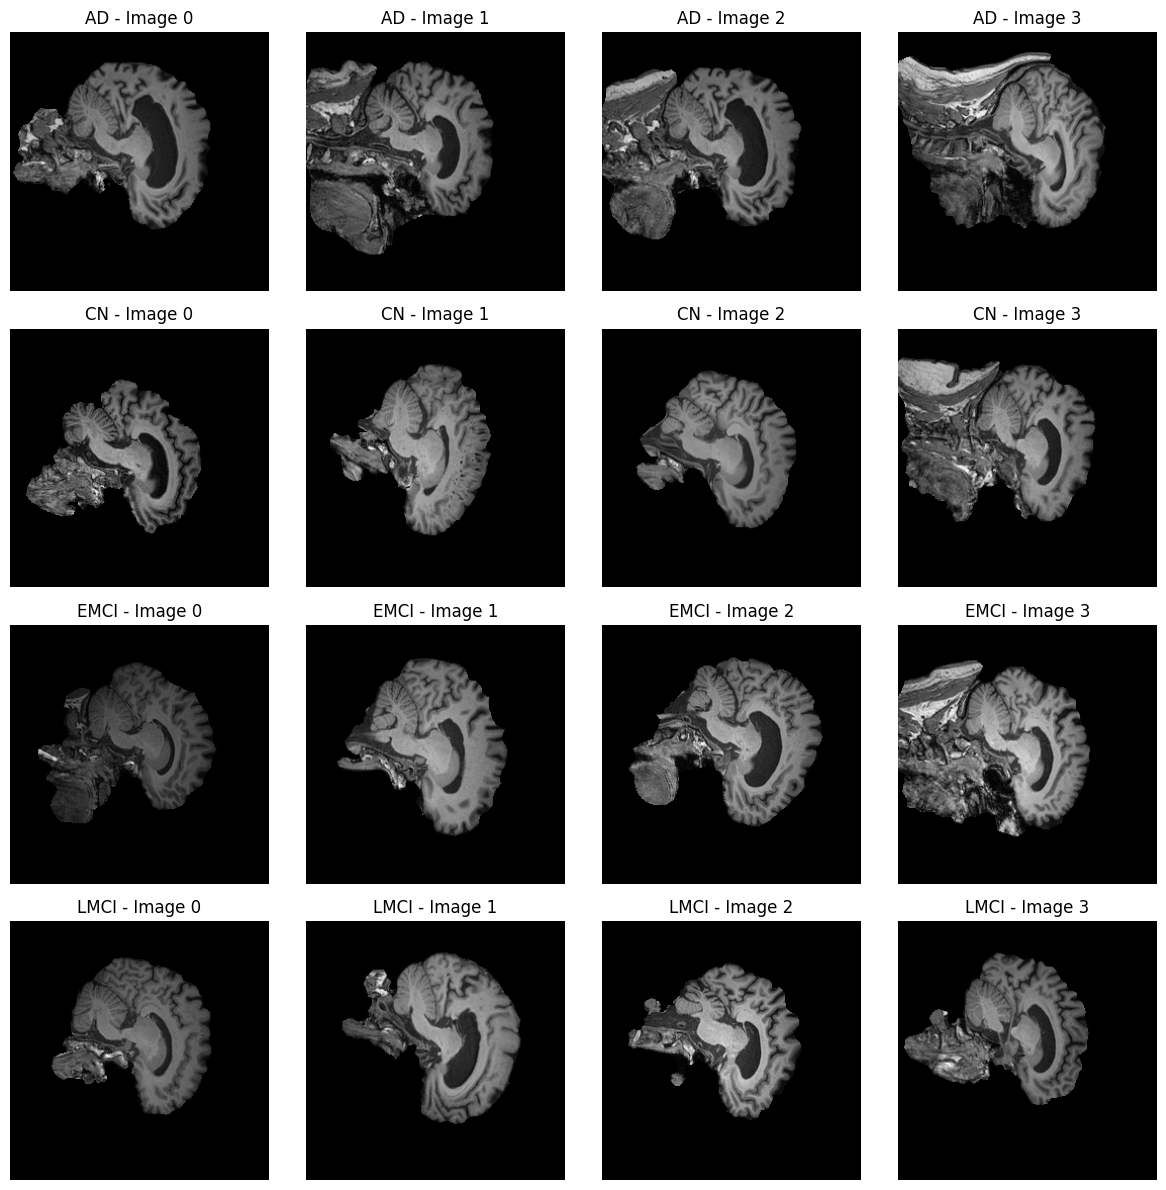

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, label in enumerate(sagittal_data.keys()):
    for j in range(4):
        if j < len(sagittal_data[label]):
            sagittal_image = sagittal_data[label][j]
            axes[i, j].imshow(sagittal_image[95], cmap='gray')
            axes[i, j].set_title(f'{label} - Image {j}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

### 3.1 Orientasi Axial

mengambil representasi 2D dari orientasi axial dengan melakukan `transpose` (penukaran sumbu), dan sumbu untuk sagittal yaitu `(0, 2, 1)`

In [12]:
axial_data = {}

def transpose_axial(image_array):
    axial_array = np.transpose(image_array, (0, 2, 1))
    return axial_array

batch_size = 2

for label, data_list in labeled_data_dict.items():
    axial_data[label] = []

    for batch_start in range(0, len(data_list), batch_size):
        batch_end = min(batch_start + batch_size, len(data_list))
        batch_data = data_list[batch_start:batch_end]

        for image_array in batch_data:
            try:
                axial_array = transpose_axial(image_array)
                axial_data[label].append(axial_array)
                del axial_array
                gc.collect()

            except Exception as e:
                print(f'Error transposing image for label {label}')
                print(f'Error message: {str(e)}')

    print(f"Processed {len(axial_data[label])} images for label {label}")

print(f"Transpose axial data telah selesai.")

Processed 200 images for label AD
Processed 200 images for label CN
Processed 200 images for label EMCI
Processed 200 images for label LMCI
Transpose axial data telah selesai.


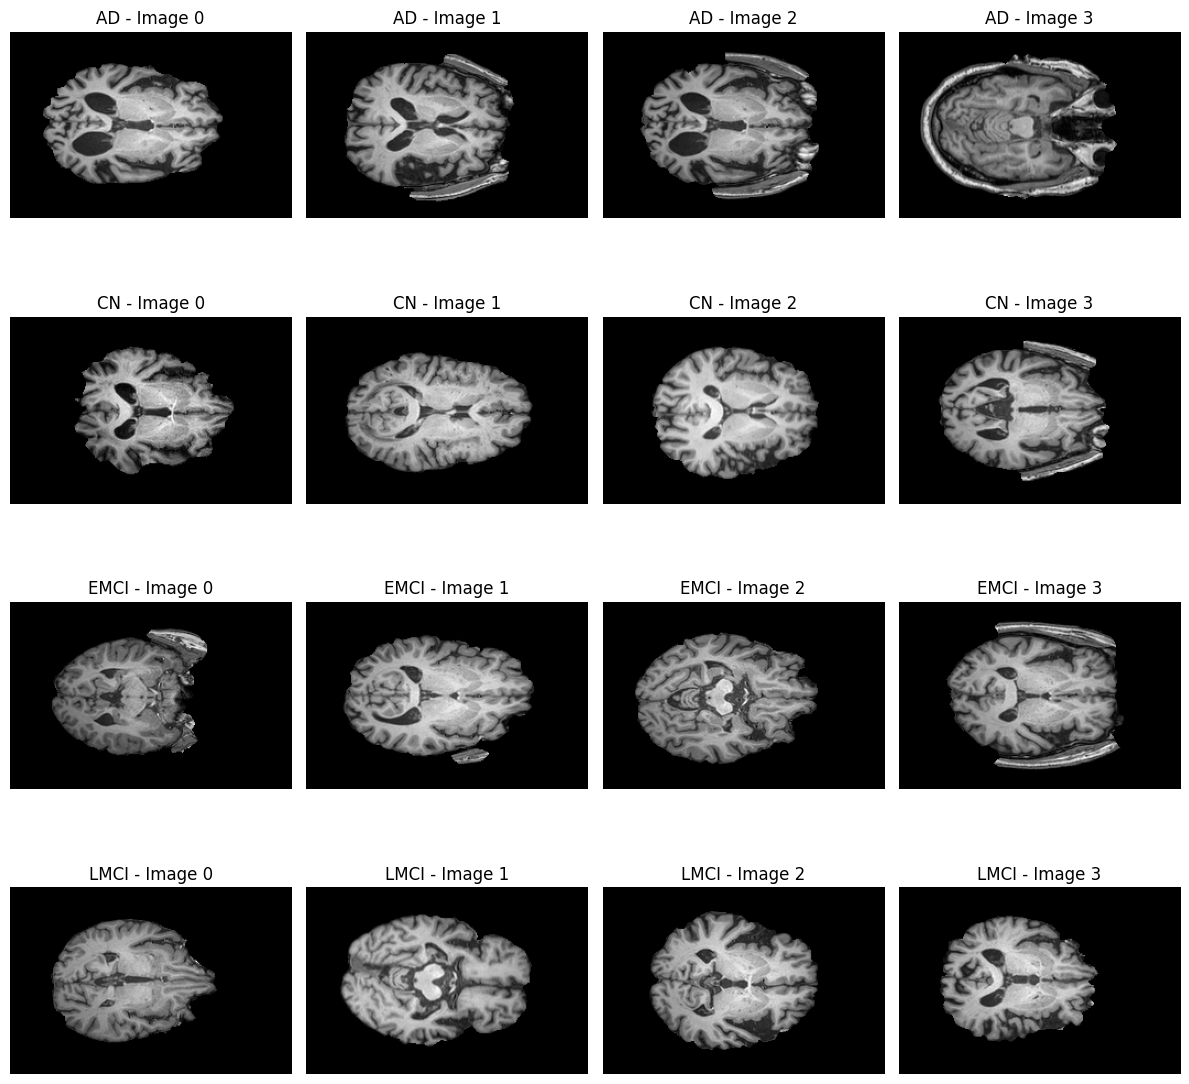

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, label in enumerate(axial_data.keys()):
    for j in range(4):
        if j < len(axial_data[label]):
            axial_image = axial_data[label][j]
            axes[i, j].imshow(axial_image[130], cmap='gray')
            axes[i, j].set_title(f'{label} - Image {j}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

### 3.3 Orientasi Coronal

mengambil representasi 2D dari orientasi coronal dengan melakukan `transpose` (penukaran sumbu), dan sumbu untuk sagittal yaitu `(0, 2, 3, 1)`

In [14]:
coronal_data = {}

def transpose_coronal(image_array):
    coronal_array = np.transpose(image_array, (1, 2, 0))
    return coronal_array

batch_size = 2

for label, data_list in labeled_data_dict.items():
    coronal_data[label] = []

    for batch_start in range(0, len(data_list), batch_size):
        batch_end = min(batch_start + batch_size, len(data_list))
        batch_data = data_list[batch_start:batch_end]

        for image_array in batch_data:
            try:
                coronal_array = transpose_coronal(image_array)
                coronal_data[label].append(coronal_array)
                del coronal_array
                gc.collect()

            except Exception as e:
                print(f'Error transposing image for label {label}')
                print(f'Error message: {str(e)}')

    print(f"Processed {len(coronal_data[label])} images for label {label}")

print(f"Transpose coronal data telah selesai.")

Processed 200 images for label AD
Processed 200 images for label CN
Processed 200 images for label EMCI
Processed 200 images for label LMCI
Transpose coronal data telah selesai.


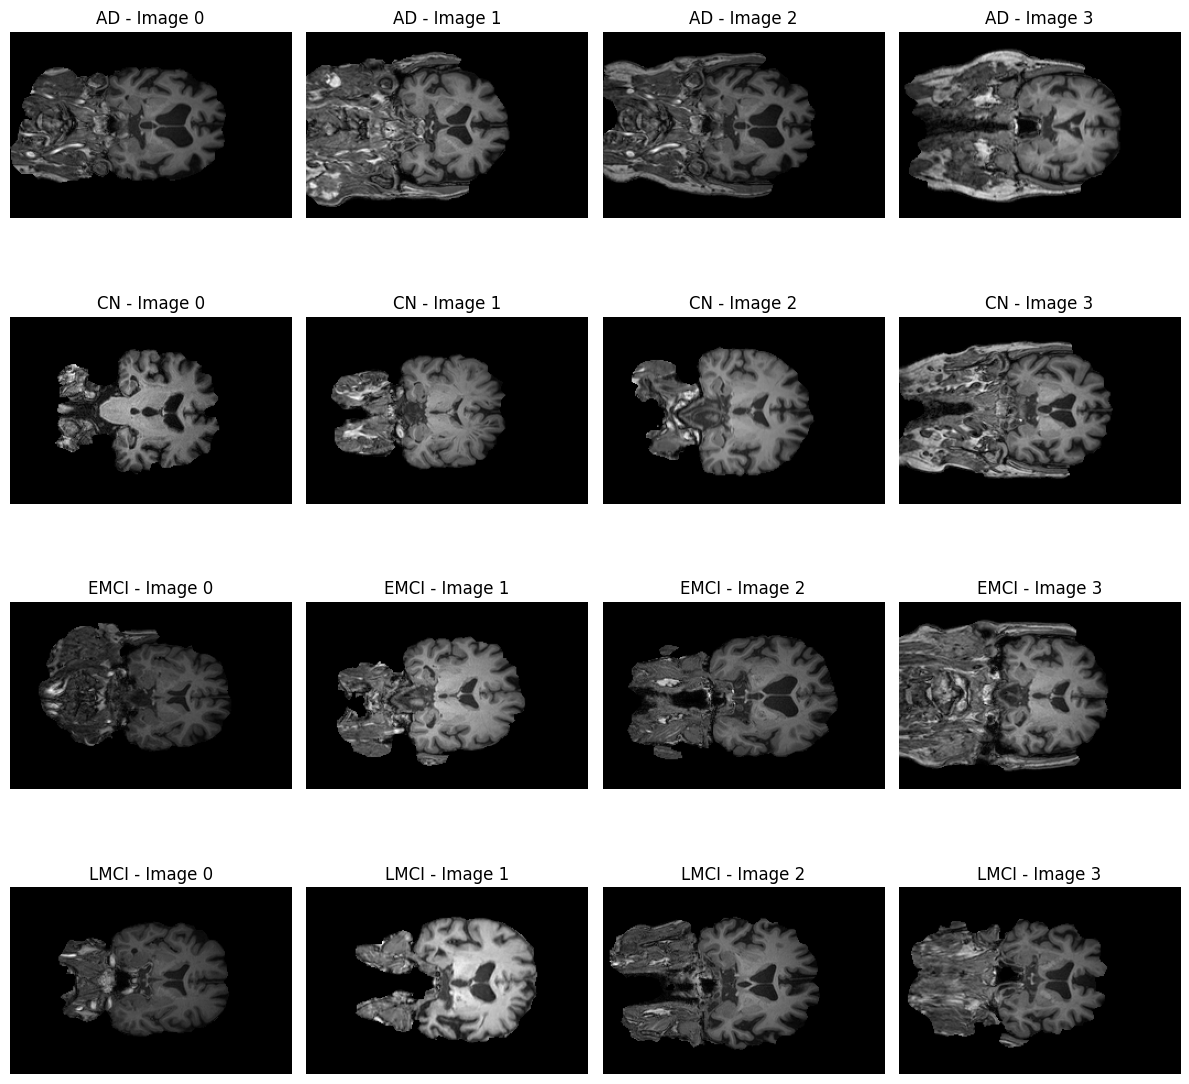

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, label in enumerate(coronal_data.keys()):
    for j in range(4):
        if j < len(coronal_data[label]):
            coronal_image = coronal_data[label][j]
            axes[i, j].imshow(coronal_image[130], cmap='gray')
            axes[i, j].set_title(f'{label} - Image {j}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

## 4. Entropy Value Calculation

### 4.1 Menetapkan fungsi untuk menghitung nilai entropy

In [16]:
def calculate_entropy_from_slice(slice):
    min_pixel = np.min(slice)
    max_pixel = np.max(slice)
    
    if min_pixel == max_pixel:
        min_pixel = 0
        max_pixel = 1

    normalized_slice = (slice - min_pixel) / (max_pixel - min_pixel)
    
    try:
        entropy_value = entropy(normalized_slice.ravel(), base=2)
    except RuntimeWarning:
        entropy_value = 0.0 
    
    return entropy_value

### 4.2 Nilai Entropy dari Orientasi Sagittal
menghitung nilai entropy dari setiap slice dalam data gambar sagittal, kemudian memilih 3 slice dengan nilai entropy tertinggi untuk setiap volume dalam setiap label. Hasilnya disimpan dalam `selected_sagittal_slice` dan dicetak bersama dengan total slice yang dipilih.

In [17]:
selected_sagittal_slice = {}

total_selected_sagittal_slice = 0

for label, data in sagittal_data.items():
    print(f"Label: {label}")
    
    top_slices = []
    
    for volume_index, volume in enumerate(data):
        slice_entropies = []
        
        for slice_index, slice in enumerate(volume):
            entropy_value = calculate_entropy_from_slice(slice)
            slice_entropies.append((slice_index, slice, entropy_value))
        
        sorted_slices = sorted(slice_entropies, key=lambda x: x[2], reverse=True)
        
        selected_sagittal_slice_for_volume = []
        for i, (index, selected_slice, entropy_value) in enumerate(sorted_slices):
            if not np.isnan(entropy_value):
                selected_sagittal_slice_for_volume.append((index, selected_slice))
            
            if len(selected_sagittal_slice_for_volume) == 3:
                break
        
        top_slices.extend(selected_sagittal_slice_for_volume)
    
    selected_sagittal_slice[label] = top_slices
    
    for i, (position, top_slice) in enumerate(top_slices):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")
    
    total_selected_sagittal_slice += len(top_slices)    

print(f"Total Slice yang Dipilih: {total_selected_sagittal_slice}")

Label: AD


c:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_entropy.py:135: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


Top Slice 1 - Position: 99, Entropy: 14.2350
Top Slice 2 - Position: 98, Entropy: 14.2313
Top Slice 3 - Position: 100, Entropy: 14.2295
Top Slice 4 - Position: 103, Entropy: 14.5892
Top Slice 5 - Position: 102, Entropy: 14.5885
Top Slice 6 - Position: 104, Entropy: 14.5779
Top Slice 7 - Position: 97, Entropy: 14.4981
Top Slice 8 - Position: 92, Entropy: 14.4942
Top Slice 9 - Position: 98, Entropy: 14.4934
Top Slice 10 - Position: 72, Entropy: 14.5887
Top Slice 11 - Position: 73, Entropy: 14.5861
Top Slice 12 - Position: 71, Entropy: 14.5857
Top Slice 13 - Position: 70, Entropy: 14.1380
Top Slice 14 - Position: 69, Entropy: 14.1364
Top Slice 15 - Position: 71, Entropy: 14.1322
Top Slice 16 - Position: 95, Entropy: 14.5129
Top Slice 17 - Position: 96, Entropy: 14.5126
Top Slice 18 - Position: 78, Entropy: 14.5062
Top Slice 19 - Position: 70, Entropy: 14.0316
Top Slice 20 - Position: 71, Entropy: 14.0308
Top Slice 21 - Position: 69, Entropy: 14.0291
Top Slice 22 - Position: 97, Entropy: 1

In [18]:
for label, top_slices in selected_sagittal_slice.items():
    print(f"Label: {label}")
    
    for i, (position, top_slice) in enumerate(top_slices[:3]):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")

Label: AD
Top Slice 1 - Position: 99, Entropy: 14.2350
Top Slice 2 - Position: 98, Entropy: 14.2313
Top Slice 3 - Position: 100, Entropy: 14.2295
Label: CN
Top Slice 1 - Position: 100, Entropy: 13.8960
Top Slice 2 - Position: 101, Entropy: 13.8921
Top Slice 3 - Position: 99, Entropy: 13.8899
Label: EMCI
Top Slice 1 - Position: 78, Entropy: 14.0022
Top Slice 2 - Position: 79, Entropy: 13.9971
Top Slice 3 - Position: 92, Entropy: 13.9956
Label: LMCI
Top Slice 1 - Position: 99, Entropy: 13.9005
Top Slice 2 - Position: 101, Entropy: 13.9000
Top Slice 3 - Position: 100, Entropy: 13.9000


Cek data yang sudah diseleksi

In [19]:
for label, data in selected_sagittal_slice.items():
    total_data = len(data)
    print(f"Label: {label}, Total Data: {total_data}")

Label: AD, Total Data: 600
Label: CN, Total Data: 600
Label: EMCI, Total Data: 600
Label: LMCI, Total Data: 600


In [20]:
for label, data in selected_sagittal_slice.items():
    for volume_index, (position, slice) in enumerate(data):
        volume_shape = slice.shape
        print(f"Label: {label}, Volume {volume_index + 1}, Slice_Position: {position}, Shape: {volume_shape}")

Label: AD, Volume 1, Slice_Position: 99, Shape: (256, 256)
Label: AD, Volume 2, Slice_Position: 98, Shape: (256, 256)
Label: AD, Volume 3, Slice_Position: 100, Shape: (256, 256)
Label: AD, Volume 4, Slice_Position: 103, Shape: (256, 256)
Label: AD, Volume 5, Slice_Position: 102, Shape: (256, 256)
Label: AD, Volume 6, Slice_Position: 104, Shape: (256, 256)
Label: AD, Volume 7, Slice_Position: 97, Shape: (256, 256)
Label: AD, Volume 8, Slice_Position: 92, Shape: (256, 256)
Label: AD, Volume 9, Slice_Position: 98, Shape: (256, 256)
Label: AD, Volume 10, Slice_Position: 72, Shape: (256, 256)
Label: AD, Volume 11, Slice_Position: 73, Shape: (256, 256)
Label: AD, Volume 12, Slice_Position: 71, Shape: (256, 256)
Label: AD, Volume 13, Slice_Position: 70, Shape: (256, 256)
Label: AD, Volume 14, Slice_Position: 69, Shape: (256, 256)
Label: AD, Volume 15, Slice_Position: 71, Shape: (256, 256)
Label: AD, Volume 16, Slice_Position: 95, Shape: (256, 256)
Label: AD, Volume 17, Slice_Position: 96, Sha

Resize Citra

In [21]:
# Fungsi untuk meresize slice menjadi ukuran yang dapat disesuaikan
def resize_slice(slice_data, target_size=(224, 224)):
    return cv2.resize(slice_data, dsize=target_size)

# Mengekstrak data dari selected_sagittal_slice
selected_sagittal_slice_resized = {}  # Dictionary untuk menyimpan hasil resize

for label, slices in selected_sagittal_slice.items():
    resized_slices = [(position, resize_slice(slice_data)) for position, slice_data in slices]
    selected_sagittal_slice_resized[label] = resized_slices

# Cetak bentuk output untuk setiap label
for label, result_slices in selected_sagittal_slice_resized.items():
    print(f"Label: {label}, Jumlah Slice Terpilih: {len(result_slices)}")

# Jika Anda ingin menampilkan bentuk dari setiap slice terpilih
for label, result_slices in selected_sagittal_slice_resized.items():
    for i, (position, resized_slice) in enumerate(result_slices):
        print(f"Label: {label}, Resized Slice {i+1} - Position: {position}, Shape: {resized_slice.shape}")

Label: AD, Jumlah Slice Terpilih: 600
Label: CN, Jumlah Slice Terpilih: 600
Label: EMCI, Jumlah Slice Terpilih: 600
Label: LMCI, Jumlah Slice Terpilih: 600
Label: AD, Resized Slice 1 - Position: 99, Shape: (224, 224)
Label: AD, Resized Slice 2 - Position: 98, Shape: (224, 224)
Label: AD, Resized Slice 3 - Position: 100, Shape: (224, 224)
Label: AD, Resized Slice 4 - Position: 103, Shape: (224, 224)
Label: AD, Resized Slice 5 - Position: 102, Shape: (224, 224)
Label: AD, Resized Slice 6 - Position: 104, Shape: (224, 224)
Label: AD, Resized Slice 7 - Position: 97, Shape: (224, 224)
Label: AD, Resized Slice 8 - Position: 92, Shape: (224, 224)
Label: AD, Resized Slice 9 - Position: 98, Shape: (224, 224)
Label: AD, Resized Slice 10 - Position: 72, Shape: (224, 224)
Label: AD, Resized Slice 11 - Position: 73, Shape: (224, 224)
Label: AD, Resized Slice 12 - Position: 71, Shape: (224, 224)
Label: AD, Resized Slice 13 - Position: 70, Shape: (224, 224)
Label: AD, Resized Slice 14 - Position: 69,

Cek hasil resize

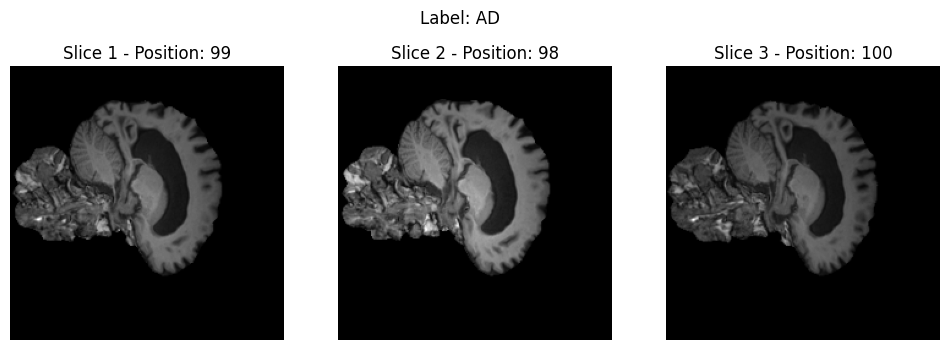

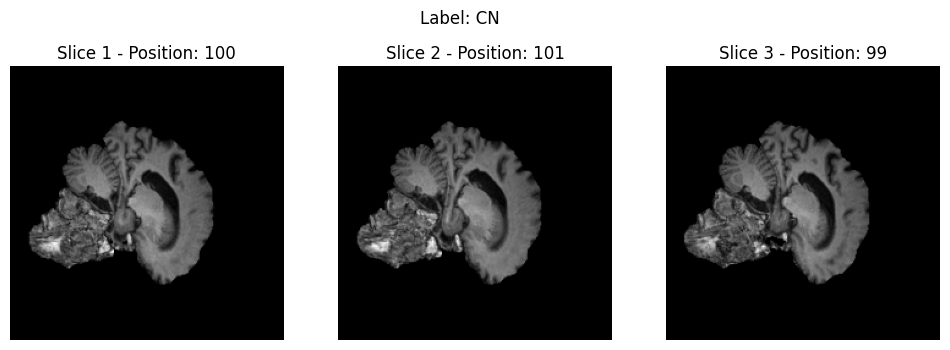

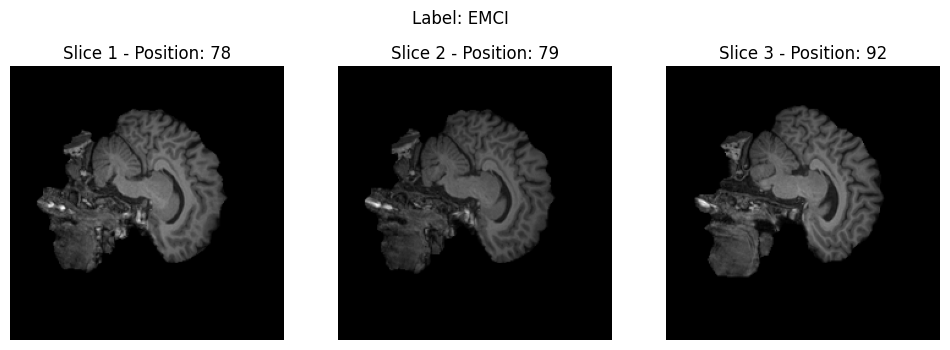

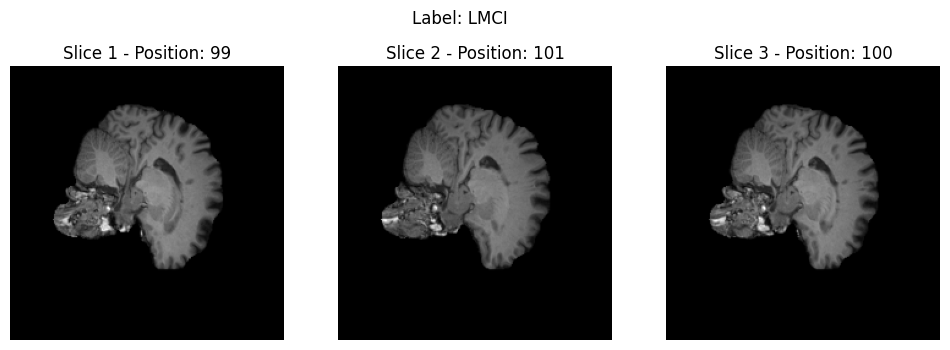

In [22]:
for label, result_slices in selected_sagittal_slice_resized.items():
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"Label: {label}")
    
    for i, (position, resized_slice) in enumerate(result_slices[:3]):
        axes[i].imshow(resized_slice, cmap='gray')
        axes[i].set_title(f"Slice {i+1} - Position: {position}")
        axes[i].axis('off')

    plt.show()

### 4.3 Nilai Entropy dari Orientasi Axial
menghitung nilai entropy dari setiap slice dalam data gambar axial, kemudian memilih 3 slice dengan nilai entropy tertinggi untuk setiap volume dalam setiap label. Hasilnya disimpan dalam `selected_axial_slice` dan dicetak bersama dengan total slice yang dipilih.

In [23]:
selected_axial_slice = {}

total_selected_axial_slice = 0

for label, data in axial_data.items():
    print(f"Label: {label}")
    
    top_slices = []
    
    for volume_index, volume in enumerate(data):
        slice_entropies = []
        
        for slice_index, slice in enumerate(volume):
            entropy_value = calculate_entropy_from_slice(slice)
            slice_entropies.append((slice_index, slice, entropy_value))
        
        sorted_slices = sorted(slice_entropies, key=lambda x: x[2], reverse=True)
        
        selected_axial_slice_for_volume = []
        for i, (index, selected_slice, entropy_value) in enumerate(sorted_slices):
            if not np.isnan(entropy_value):
                selected_axial_slice_for_volume.append((index, selected_slice))
            
            if len(selected_axial_slice_for_volume) == 3:
                break
        
        top_slices.extend(selected_axial_slice_for_volume)
    
    selected_axial_slice[label] = top_slices
    
    for i, (position, top_slice) in enumerate(top_slices):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")
    
    total_selected_axial_slice += len(top_slices)    

print(f"Total Slice yang Dipilih: {total_selected_axial_slice}")

Label: AD
Top Slice 1 - Position: 140, Entropy: 13.6156
Top Slice 2 - Position: 141, Entropy: 13.6148
Top Slice 3 - Position: 139, Entropy: 13.6135
Top Slice 4 - Position: 50, Entropy: 14.0915
Top Slice 5 - Position: 51, Entropy: 14.0903
Top Slice 6 - Position: 49, Entropy: 14.0844
Top Slice 7 - Position: 128, Entropy: 13.8494
Top Slice 8 - Position: 127, Entropy: 13.8487
Top Slice 9 - Position: 126, Entropy: 13.8477
Top Slice 10 - Position: 137, Entropy: 13.9989
Top Slice 11 - Position: 138, Entropy: 13.9968
Top Slice 12 - Position: 135, Entropy: 13.9950
Top Slice 13 - Position: 150, Entropy: 13.6526
Top Slice 14 - Position: 149, Entropy: 13.6513
Top Slice 15 - Position: 148, Entropy: 13.6502
Top Slice 16 - Position: 115, Entropy: 13.6730
Top Slice 17 - Position: 62, Entropy: 13.6718
Top Slice 18 - Position: 116, Entropy: 13.6706
Top Slice 19 - Position: 147, Entropy: 13.6130
Top Slice 20 - Position: 146, Entropy: 13.6126
Top Slice 21 - Position: 145, Entropy: 13.6072
Top Slice 22 - P

In [24]:
for label, top_slices in selected_axial_slice.items():
    print(f"Label: {label}")
    
    for i, (position, top_slice) in enumerate(top_slices[:3]):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")

Label: AD
Top Slice 1 - Position: 140, Entropy: 13.6156
Top Slice 2 - Position: 141, Entropy: 13.6148
Top Slice 3 - Position: 139, Entropy: 13.6135
Label: CN
Top Slice 1 - Position: 139, Entropy: 13.3674
Top Slice 2 - Position: 138, Entropy: 13.3639
Top Slice 3 - Position: 140, Entropy: 13.3623
Label: EMCI
Top Slice 1 - Position: 122, Entropy: 13.4778
Top Slice 2 - Position: 121, Entropy: 13.4743
Top Slice 3 - Position: 123, Entropy: 13.4742
Label: LMCI
Top Slice 1 - Position: 143, Entropy: 13.5752
Top Slice 2 - Position: 142, Entropy: 13.5750
Top Slice 3 - Position: 144, Entropy: 13.5744


Cek data yang sudah diseleksi

In [25]:
for label, data in selected_axial_slice.items():
    total_data = len(data)
    print(f"Label: {label}, Total Data: {total_data}")

Label: AD, Total Data: 600
Label: CN, Total Data: 600
Label: EMCI, Total Data: 600
Label: LMCI, Total Data: 600


In [26]:
for label, data in selected_axial_slice.items():
    for volume_index, (position, slice) in enumerate(data):
        volume_shape = slice.shape
        print(f"Label: {label}, Volume {volume_index + 1}, Slice_Position: {position}, Shape: {volume_shape}")

Label: AD, Volume 1, Slice_Position: 140, Shape: (170, 256)
Label: AD, Volume 2, Slice_Position: 141, Shape: (170, 256)
Label: AD, Volume 3, Slice_Position: 139, Shape: (170, 256)
Label: AD, Volume 4, Slice_Position: 50, Shape: (170, 256)
Label: AD, Volume 5, Slice_Position: 51, Shape: (170, 256)
Label: AD, Volume 6, Slice_Position: 49, Shape: (170, 256)
Label: AD, Volume 7, Slice_Position: 128, Shape: (170, 256)
Label: AD, Volume 8, Slice_Position: 127, Shape: (170, 256)
Label: AD, Volume 9, Slice_Position: 126, Shape: (170, 256)
Label: AD, Volume 10, Slice_Position: 137, Shape: (170, 256)
Label: AD, Volume 11, Slice_Position: 138, Shape: (170, 256)
Label: AD, Volume 12, Slice_Position: 135, Shape: (170, 256)
Label: AD, Volume 13, Slice_Position: 150, Shape: (170, 256)
Label: AD, Volume 14, Slice_Position: 149, Shape: (170, 256)
Label: AD, Volume 15, Slice_Position: 148, Shape: (170, 256)
Label: AD, Volume 16, Slice_Position: 115, Shape: (170, 256)
Label: AD, Volume 17, Slice_Position

Resize Citra

In [27]:
def resize_slice(slice_data, target_size=(224, 224)):
    return cv2.resize(slice_data, dsize=target_size)

selected_axial_slice_resized = {} 

for label, slices in selected_axial_slice.items():
    resized_slices = [(position, resize_slice(slice_data)) for position, slice_data in slices]
    selected_axial_slice_resized[label] = resized_slices

for label, result_slices in selected_axial_slice_resized.items():
    print(f"Label: {label}, Jumlah Slice Terpilih: {len(result_slices)}")

for label, result_slices in selected_axial_slice_resized.items():
    for i, (position, resized_slice) in enumerate(result_slices):
        print(f"Label: {label}, Resized Slice {i+1} - Position: {position}, Shape: {resized_slice.shape}")

Label: AD, Jumlah Slice Terpilih: 600
Label: CN, Jumlah Slice Terpilih: 600
Label: EMCI, Jumlah Slice Terpilih: 600
Label: LMCI, Jumlah Slice Terpilih: 600
Label: AD, Resized Slice 1 - Position: 140, Shape: (224, 224)
Label: AD, Resized Slice 2 - Position: 141, Shape: (224, 224)
Label: AD, Resized Slice 3 - Position: 139, Shape: (224, 224)
Label: AD, Resized Slice 4 - Position: 50, Shape: (224, 224)
Label: AD, Resized Slice 5 - Position: 51, Shape: (224, 224)
Label: AD, Resized Slice 6 - Position: 49, Shape: (224, 224)
Label: AD, Resized Slice 7 - Position: 128, Shape: (224, 224)
Label: AD, Resized Slice 8 - Position: 127, Shape: (224, 224)
Label: AD, Resized Slice 9 - Position: 126, Shape: (224, 224)
Label: AD, Resized Slice 10 - Position: 137, Shape: (224, 224)
Label: AD, Resized Slice 11 - Position: 138, Shape: (224, 224)
Label: AD, Resized Slice 12 - Position: 135, Shape: (224, 224)
Label: AD, Resized Slice 13 - Position: 150, Shape: (224, 224)
Label: AD, Resized Slice 14 - Positio

Cek Hasil Resize

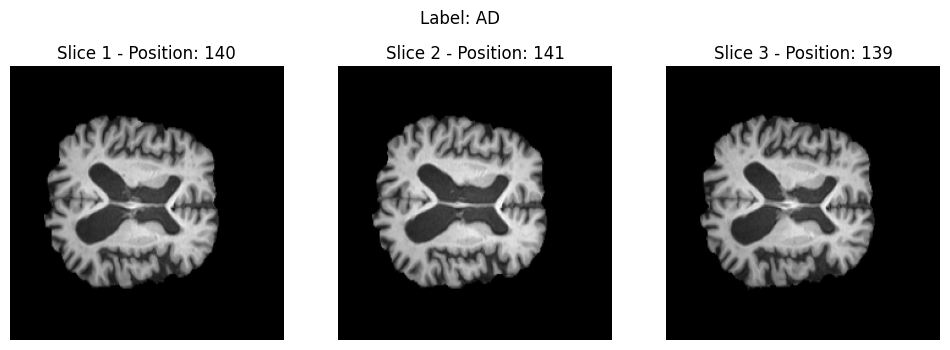

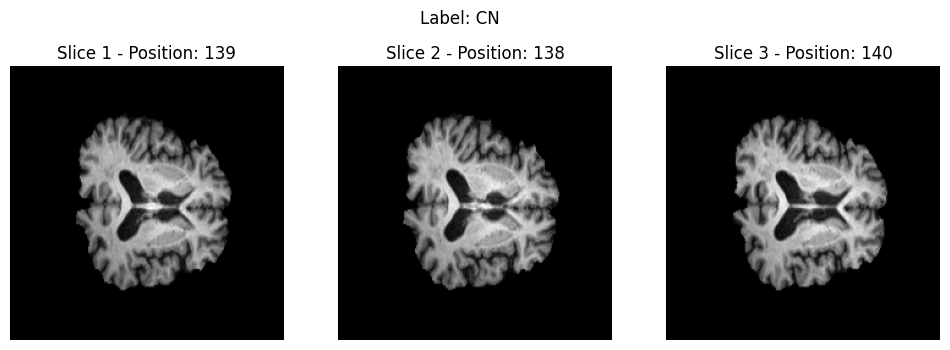

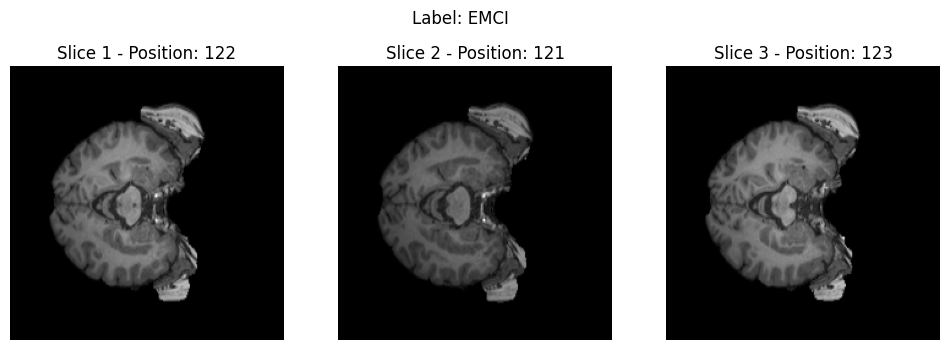

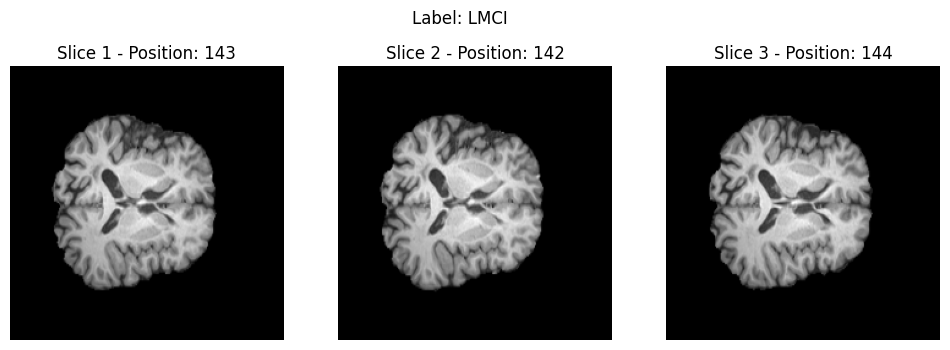

In [28]:
for label, result_slices in selected_axial_slice_resized.items():
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"Label: {label}")
    
    for i, (position, resized_slice) in enumerate(result_slices[:3]):
        axes[i].imshow(resized_slice, cmap='gray')
        axes[i].set_title(f"Slice {i+1} - Position: {position}")
        axes[i].axis('off')

    plt.show()

### 4.4 Nilai Entropy dari Orientasi Coronal
menghitung nilai entropy dari setiap slice dalam data gambar coronal, kemudian memilih 3 slice dengan nilai entropy tertinggi untuk setiap volume dalam setiap label. Hasilnya disimpan dalam `selected_coronal_slice` dan dicetak bersama dengan total slice yang dipilih.

In [29]:
selected_coronal_slice = {}

total_selected_coronal_slice = 0

for label, data in coronal_data.items():
    print(f"Label: {label}")
    
    top_slices = []
    
    for volume_index, volume in enumerate(data):
        slice_entropies = []
        
        for slice_index, slice in enumerate(volume):
            entropy_value = calculate_entropy_from_slice(slice)
            slice_entropies.append((slice_index, slice, entropy_value))
        
        sorted_slices = sorted(slice_entropies, key=lambda x: x[2], reverse=True)
        
        selected_coronal_slice_for_volume = []
        for i, (index, selected_slice, entropy_value) in enumerate(sorted_slices):
            if not np.isnan(entropy_value):
                selected_coronal_slice_for_volume.append((index, selected_slice))
            
            if len(selected_coronal_slice_for_volume) == 3:
                break
        
        top_slices.extend(selected_coronal_slice_for_volume)
    
    selected_coronal_slice[label] = top_slices
    
    for i, (position, top_slice) in enumerate(top_slices):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")
    
    total_selected_coronal_slice += len(top_slices)    

print(f"Total Slice yang Dipilih: {total_selected_coronal_slice}")

Label: AD
Top Slice 1 - Position: 129, Entropy: 13.8944
Top Slice 2 - Position: 128, Entropy: 13.8941
Top Slice 3 - Position: 130, Entropy: 13.8882
Top Slice 4 - Position: 131, Entropy: 14.2276
Top Slice 5 - Position: 132, Entropy: 14.2265
Top Slice 6 - Position: 133, Entropy: 14.2264
Top Slice 7 - Position: 132, Entropy: 14.1661
Top Slice 8 - Position: 133, Entropy: 14.1652
Top Slice 9 - Position: 129, Entropy: 14.1631
Top Slice 10 - Position: 122, Entropy: 14.2979
Top Slice 11 - Position: 121, Entropy: 14.2960
Top Slice 12 - Position: 120, Entropy: 14.2950
Top Slice 13 - Position: 132, Entropy: 13.7595
Top Slice 14 - Position: 136, Entropy: 13.7588
Top Slice 15 - Position: 133, Entropy: 13.7562
Top Slice 16 - Position: 131, Entropy: 14.1349
Top Slice 17 - Position: 132, Entropy: 14.1332
Top Slice 18 - Position: 130, Entropy: 14.1323
Top Slice 19 - Position: 132, Entropy: 13.7680
Top Slice 20 - Position: 131, Entropy: 13.7669
Top Slice 21 - Position: 130, Entropy: 13.7653
Top Slice 22

In [30]:
for label, top_slices in selected_coronal_slice.items():
    print(f"Label: {label}")
    
    for i, (position, top_slice) in enumerate(top_slices[:3]):
        entropy_value = calculate_entropy_from_slice(top_slice)
        print(f"Top Slice {i+1} - Position: {position}, Entropy: {entropy_value:.4f}")

Label: AD
Top Slice 1 - Position: 129, Entropy: 13.8944
Top Slice 2 - Position: 128, Entropy: 13.8941
Top Slice 3 - Position: 130, Entropy: 13.8882
Label: CN
Top Slice 1 - Position: 152, Entropy: 13.4701
Top Slice 2 - Position: 153, Entropy: 13.4695
Top Slice 3 - Position: 154, Entropy: 13.4615
Label: EMCI
Top Slice 1 - Position: 131, Entropy: 13.7240
Top Slice 2 - Position: 132, Entropy: 13.7226
Top Slice 3 - Position: 130, Entropy: 13.7181
Label: LMCI
Top Slice 1 - Position: 97, Entropy: 13.5065
Top Slice 2 - Position: 98, Entropy: 13.5056
Top Slice 3 - Position: 94, Entropy: 13.5028


Cek data yang sudah diseleksi

In [31]:
for label, data in selected_coronal_slice.items():
    total_data = len(data)
    print(f"Label: {label}, Total Data: {total_data}")

Label: AD, Total Data: 600
Label: CN, Total Data: 600
Label: EMCI, Total Data: 600
Label: LMCI, Total Data: 600


In [32]:
for label, data in selected_coronal_slice.items():
    for volume_index, (position, slice) in enumerate(data):
        volume_shape = slice.shape
        print(f"Label: {label}, Volume {volume_index + 1}, Slice_Position: {position}, Shape: {volume_shape}")

Label: AD, Volume 1, Slice_Position: 129, Shape: (170, 256)
Label: AD, Volume 2, Slice_Position: 128, Shape: (170, 256)
Label: AD, Volume 3, Slice_Position: 130, Shape: (170, 256)
Label: AD, Volume 4, Slice_Position: 131, Shape: (170, 256)
Label: AD, Volume 5, Slice_Position: 132, Shape: (170, 256)
Label: AD, Volume 6, Slice_Position: 133, Shape: (170, 256)
Label: AD, Volume 7, Slice_Position: 132, Shape: (170, 256)
Label: AD, Volume 8, Slice_Position: 133, Shape: (170, 256)
Label: AD, Volume 9, Slice_Position: 129, Shape: (170, 256)
Label: AD, Volume 10, Slice_Position: 122, Shape: (170, 256)
Label: AD, Volume 11, Slice_Position: 121, Shape: (170, 256)
Label: AD, Volume 12, Slice_Position: 120, Shape: (170, 256)
Label: AD, Volume 13, Slice_Position: 132, Shape: (170, 256)
Label: AD, Volume 14, Slice_Position: 136, Shape: (170, 256)
Label: AD, Volume 15, Slice_Position: 133, Shape: (170, 256)
Label: AD, Volume 16, Slice_Position: 131, Shape: (170, 256)
Label: AD, Volume 17, Slice_Posit

Resize Citra

In [33]:
def resize_slice(slice_data, target_size=(224, 224)):
    return cv2.resize(slice_data, dsize=target_size)

selected_coronal_slice_resized = {}

for label, slices in selected_coronal_slice.items():
    resized_slices = [(position, resize_slice(slice_data)) for position, slice_data in slices]
    selected_coronal_slice_resized[label] = resized_slices

for label, result_slices in selected_coronal_slice_resized.items():
    print(f"Label: {label}, Jumlah Slice Terpilih: {len(result_slices)}")

for label, result_slices in selected_coronal_slice_resized.items():
    for i, (position, resized_slice) in enumerate(result_slices):
        print(f"Label: {label}, Resized Slice {i+1} - Position: {position}, Shape: {resized_slice.shape}")

Label: AD, Jumlah Slice Terpilih: 600
Label: CN, Jumlah Slice Terpilih: 600
Label: EMCI, Jumlah Slice Terpilih: 600
Label: LMCI, Jumlah Slice Terpilih: 600
Label: AD, Resized Slice 1 - Position: 129, Shape: (224, 224)
Label: AD, Resized Slice 2 - Position: 128, Shape: (224, 224)
Label: AD, Resized Slice 3 - Position: 130, Shape: (224, 224)
Label: AD, Resized Slice 4 - Position: 131, Shape: (224, 224)
Label: AD, Resized Slice 5 - Position: 132, Shape: (224, 224)
Label: AD, Resized Slice 6 - Position: 133, Shape: (224, 224)
Label: AD, Resized Slice 7 - Position: 132, Shape: (224, 224)
Label: AD, Resized Slice 8 - Position: 133, Shape: (224, 224)
Label: AD, Resized Slice 9 - Position: 129, Shape: (224, 224)
Label: AD, Resized Slice 10 - Position: 122, Shape: (224, 224)
Label: AD, Resized Slice 11 - Position: 121, Shape: (224, 224)
Label: AD, Resized Slice 12 - Position: 120, Shape: (224, 224)
Label: AD, Resized Slice 13 - Position: 132, Shape: (224, 224)
Label: AD, Resized Slice 14 - Posi

Cek Hasil

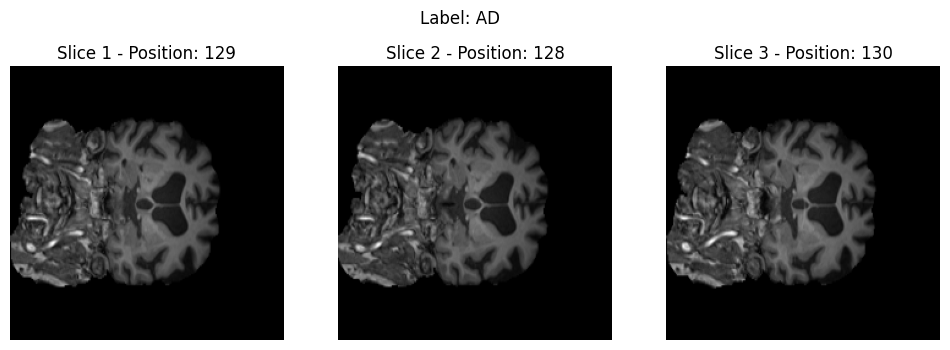

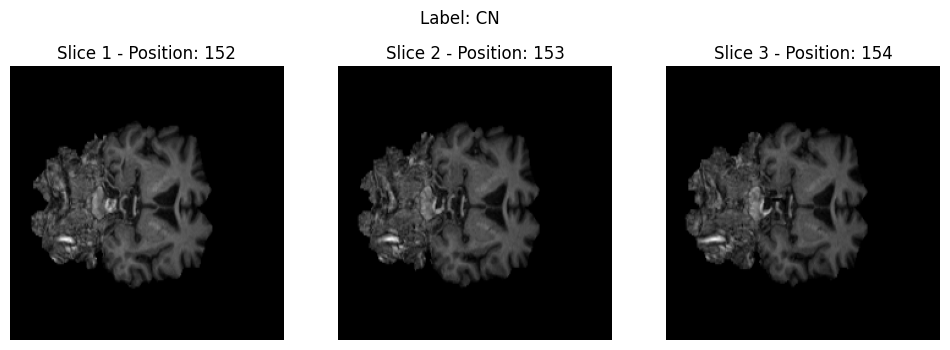

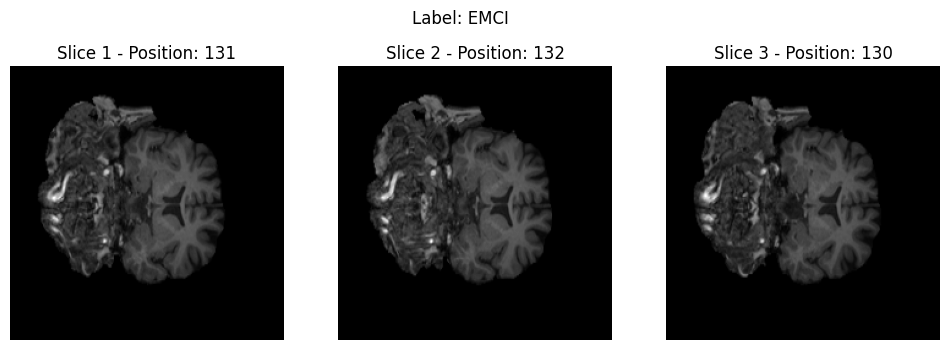

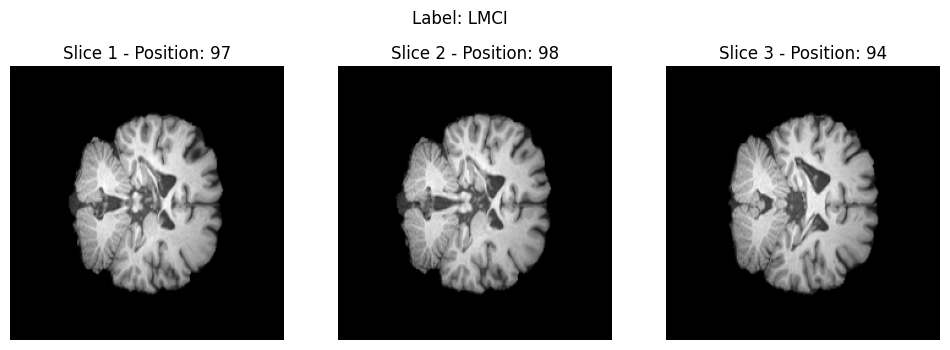

In [34]:
for label, result_slices in selected_coronal_slice_resized.items():
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"Label: {label}")
    
    for i, (position, resized_slice) in enumerate(result_slices[:3]):
        axes[i].imshow(resized_slice, cmap='gray')
        axes[i].set_title(f"Slice {i+1} - Position: {position}")
        axes[i].axis('off')

    plt.show()

## 5. Gabungkan Semua Citra

In [35]:
combined_slices = {}

for plane, slices_dict in {'coronal': selected_coronal_slice_resized, 'axial': selected_axial_slice_resized, 'sagittal': selected_sagittal_slice_resized}.items():
    for label, result_slices in slices_dict.items():
        combined_slices.setdefault(label, {})[plane] = result_slices

In [36]:
for label, plane_slices in combined_slices.items():
    total_slices = sum(len(slices) for slices in plane_slices.values())
    print(f"Label: {label}, Jumlah Total Slice: {total_slices}")

Label: AD, Jumlah Total Slice: 1800
Label: CN, Jumlah Total Slice: 1800
Label: EMCI, Jumlah Total Slice: 1800
Label: LMCI, Jumlah Total Slice: 1800


## 6. Simpan Data

In [37]:
np.savez("selected_image.npz", combined_slices=combined_slices)
print(f"Data disimpan dengan sukses ke selected_image.npz")

Data disimpan dengan sukses ke selected_image.npz
